# Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

1. Using lemonade.csv dataset and focusing on continuous variables:

In [2]:
df = pd.read_csv('lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.isna().sum()

Date           0
Day            0
Temperature    0
Rainfall       0
Flyers         0
Price          0
Sales          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1275b5690>,
      dtype=object)

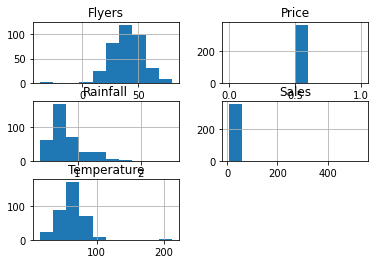

In [5]:
df.hist()

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [6]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def get_lower_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    return s.apply(lambda x: min([x - lower_bound, 0]))

def outliers(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)
    lower = pd.DataFrame()
    upper = pd.DataFrame()
    for col in df.select_dtypes('number'):
        lower[col + '_lower_outliers'] = get_lower_outliers(df[col], k)
        upper[col + '_upper_outliers'] = get_upper_outliers(df[col], k)
        df2 = lower.join(upper)
    return df2

In [7]:

df2 = outliers(df, 1.5)

In [8]:
df2.min()

Temperature_lower_outliers    -1.6
Rainfall_lower_outliers        0.0
Flyers_lower_outliers        -42.0
Price_lower_outliers           0.0
Sales_lower_outliers           0.0
Temperature_upper_outliers     0.0
Rainfall_upper_outliers        0.0
Flyers_upper_outliers          0.0
Price_upper_outliers           0.0
Sales_upper_outliers           0.0
dtype: float64

In [9]:
df2.Flyers_lower_outliers.sort_values(ascending=True)

324   -42.0
0       0.0
247     0.0
246     0.0
245     0.0
       ... 
117     0.0
116     0.0
115     0.0
113     0.0
364     0.0
Name: Flyers_lower_outliers, Length: 365, dtype: float64

In [10]:
df.Flyers.sort_values(ascending=True)

324   -38
364     9
338    11
343    15
27     15
       ..
207    74
171    76
198    76
166    77
194    80
Name: Flyers, Length: 365, dtype: int64

>**We need to drop the -38 in the Flyers outlier
everything else makes sense**

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [11]:
df3 = outliers(df, 3)

In [12]:
df3.max()

Temperature_lower_outliers      0.00
Rainfall_lower_outliers         0.00
Flyers_lower_outliers           0.00
Price_lower_outliers            0.00
Sales_lower_outliers            0.00
Temperature_upper_outliers     74.30
Rainfall_upper_outliers         0.81
Flyers_upper_outliers           0.00
Price_upper_outliers            0.00
Sales_upper_outliers          474.00
dtype: float64

In [13]:
df2.Sales_upper_outliers.sort_values()

0        0.0
247      0.0
246      0.0
245      0.0
244      0.0
       ...  
364      0.0
258     42.0
185     54.0
183    190.0
184    489.0
Name: Sales_upper_outliers, Length: 365, dtype: float64

In [14]:
df.Sales.sort_values(ascending=False)

184    534
183    235
185     99
258     87
207     43
      ... 
343     11
5       11
0       10
338     10
364      7
Name: Sales, Length: 365, dtype: int64

In [15]:
df3.Temperature_upper_outliers.sort_values(ascending=False)

41     74.3
364     0.0
125     0.0
116     0.0
117     0.0
       ... 
244     0.0
245     0.0
246     0.0
247     0.0
0       0.0
Name: Temperature_upper_outliers, Length: 365, dtype: float64

> **definitly cut that 212 degree outlier in temperatre ahah
and those 2 days where the lemonade stand sold well over $100
those would be good candidates of cutting**

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127ef3410>,
      dtype=object)

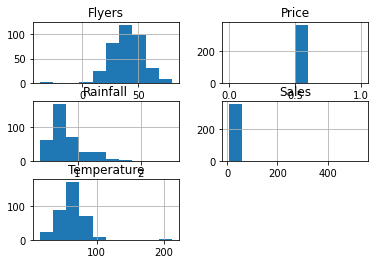

In [16]:
df.hist()

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

In [17]:
data_mean, data_std = df.mean(), df.std()

cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [33]:
mean = df.mean()
upper = mean + df.std() * 2
lower = mean - df.std() * 2
for col in df.select_dtypes('number'):
    

Temperature    36.171785
Rainfall        0.547781
Flyers         27.572889
Price           0.000000
Sales          59.959360
dtype: float64

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv